##Tabla comparativa de los métodos utilizados con y sin PCA

| **Método**         | **Silhouette Score (con PCA)** | **Davies-Bouldin Index (con PCA)** | **Calinski-Harabasz Index (con PCA)** | **Silhouette Score (sin PCA)** | **Davies-Bouldin Index (sin PCA)** | **Calinski-Harabasz Index (sin PCA)** |
|--------------------|-------------------------------|-----------------------------------|-------------------------------------|-------------------------------|-----------------------------------|-------------------------------------|
| **GMM**            | 0.394                         | 1.170                             | 6.713                               | 0.371                         | 1.183                             | 5.518                               |
| **Agglomerative**  | 0.413                         | 1.956                             | 8.607                               | 0.260                         | 2.203                             | 7.770                               |
| **Spectral**       | 0.595                         | 0.280                             | 8.250                               | 0.568                         | 0.302                             | 7.474                               |


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

seed = [1234, 5678, 91011,49114865, 123456789, 1234567890, 1234567891, 1234567892, 1234567893, 1234567894]

# Cargar el archivo de datos
df = pd.read_excel('preprocesado/datos_dauco_solo.xlsx')

# Aplicar PCA para reducir la dimensionalidad 
X = df.drop(columns=['MenorID']).values # Eliminamos la columna 'MenorID' que no es relevante para PCA

# Normalizar los datos (opcional pero recomendado para PCA)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
components_to_retain = 32

# Reducir la dimensionalidad a los componentes seleccionados
pca = PCA(n_components=components_to_retain)
X_reduced = pca.fit_transform(X_scaled)

# Sin PCA funciona peor.
''' 
Los resultados sin PCA muestran un rendimiento más bajo,
como era de esperar, especialmente con el algoritmo Agglomerative, 
que tiene un Silhouette Score muy bajo y un Davies-Bouldin Index alto, 
lo que indica que los clusters no están bien separados.
Esto puede ser causado por el ruido o las relaciones no lineales en los datos sin la reducción de dimensionalidad.
'''
# X_reduced = X_scaled # Probamos con los datos sin reducir la dimensionalidad

In [1]:
!pip install hdbscan

   ---------------------------------------- 0.0/732.2 kB ? eta -:--:--
   --------------------------------------- 732.2/732.2 kB 14.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import hdbscan

# Diccionario para guardar resultados
resultados = {}

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=5)
labels_agg = agg.fit_predict(X_reduced)
resultados['Agglomerative'] = labels_agg

# DBSCAN
dbscan = DBSCAN(eps=2.0, min_samples=5)  # Puedes ajustar estos parámetros
labels_dbscan = dbscan.fit_predict(X_reduced)
resultados['DBSCAN'] = labels_dbscan

# HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
labels_hdbscan = clusterer.fit_predict(X_reduced)
resultados['HDBSCAN'] = labels_hdbscan

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=5)
labels_gmm = gmm.fit_predict(X_reduced)
resultados['GMM'] = labels_gmm

# Spectral Clustering
spectral = SpectralClustering(n_clusters=5, assign_labels='kmeans', random_state=0)
labels_spectral = spectral.fit_predict(X_reduced)
resultados['Spectral'] = labels_spectral

# Evaluación
for name, labels in resultados.items():
    if len(set(labels)) > 1 and -1 not in set(labels):  # Silhouette solo si hay más de un grupo y sin "ruido"
        silhouette = silhouette_score(X_reduced, labels)
        db = davies_bouldin_score(X_reduced, labels)
        ch = calinski_harabasz_score(X_reduced, labels)
        print(f"{name}:\n  Silhouette Score: {silhouette:.3f}\n  Davies-Bouldin Index: {db:.3f}\n  Calinski-Harabasz Index: {ch:.3f}\n")
    else:
        print(f"{name} no tiene clusters válidos para evaluación (posiblemente muchos -1 o solo un grupo).")


c:\Users\alber\Desktop\Alberto\Trabajo de Fin de Máster\Trabajo-Fin-de-M-ster\Códigos\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\alber\Desktop\Alberto\Trabajo de Fin de Máster\Trabajo-Fin-de-M-ster\Códigos\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Agglomerative:
  Silhouette Score: 0.260
  Davies-Bouldin Index: 2.203
  Calinski-Harabasz Index: 7.770

DBSCAN no tiene clusters válidos para evaluación (posiblemente muchos -1 o solo un grupo).
HDBSCAN no tiene clusters válidos para evaluación (posiblemente muchos -1 o solo un grupo).
GMM:
  Silhouette Score: 0.393
  Davies-Bouldin Index: 1.202
  Calinski-Harabasz Index: 4.569

Spectral:
  Silhouette Score: 0.546
  Davies-Bouldin Index: 0.311
  Calinski-Harabasz Index: 7.280



c:\Users\alber\Desktop\Alberto\Trabajo de Fin de Máster\Trabajo-Fin-de-M-ster\Códigos\venv\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


## Spectral Clustering

c:\Users\alber\Desktop\Alberto\Trabajo de Fin de Máster\Trabajo-Fin-de-M-ster\Códigos\venv\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\alber\Desktop\Alberto\Trabajo de Fin de Máster\Trabajo-Fin-de-M-ster\Códigos\venv\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\alber\Desktop\Alberto\Trabajo de Fin de Máster\Trabajo-Fin-de-M-ster\Códigos\venv\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\alber\Desktop\Alberto\Trabajo de Fin de Máster\Trabajo-Fin-de-M-ster\Códigos

Promedio de métricas (Spectral):
Silhouette Score: 0.568 ± 0.014
Davies-Bouldin Index: 0.302 ± 0.006
Calinski-Harabasz Index: 7.474 ± 0.127


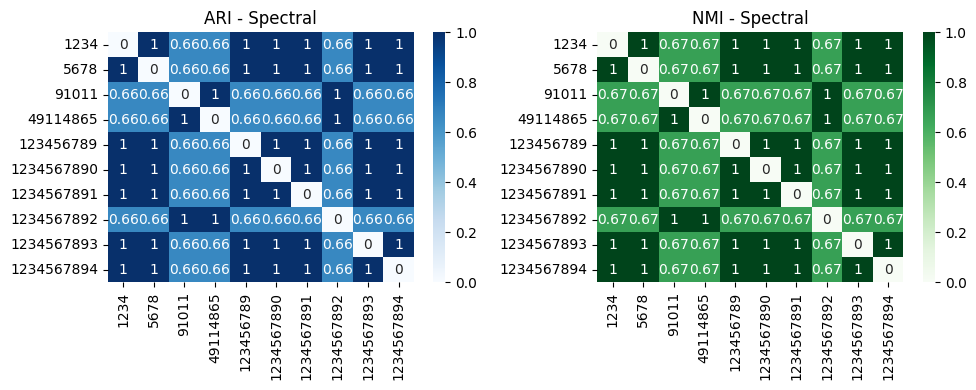

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
from openpyxl.styles import PatternFill

num_clusters = 5
labels_dict = {}
metrics = []
colors = {
    0: "FFFF99", 1: "FFCC99", 2: "99CCFF", 3: "CCFF99", 4: "FF99CC",
    5: "FF6666", 6: "66FF66", 7: "6666FF", 8: "FF66FF"
}

for s in seed:
    clustering = SpectralClustering(random_state=s, n_clusters=num_clusters, assign_labels='kmeans')
    labels = clustering.fit_predict(X_reduced)
    labels_dict[s] = labels
    
    df['Cluster'] = labels
    # Guardar DataFrame en Excel
    base_path = f'clusters/spectral/spectral_clustering_{num_clusters}_{s}_.xlsx'
    df.to_excel(base_path, index=False)

    # Colorear Excel
    wb = openpyxl.load_workbook(base_path)
    ws = wb.active
    cluster_col_idx = df.columns.get_loc('Cluster') + 1

    for row in ws.iter_rows(min_row=2, max_row=ws.max_row):
        cluster_val = row[cluster_col_idx - 1].value
        fill_color = colors.get(cluster_val, "FFFFFF")
        fill = PatternFill(start_color=fill_color, end_color=fill_color, fill_type="solid")
        for cell in row:
            cell.fill = fill

    wb.save(f'clusters/spectral/colored_spectral_clustering_{num_clusters}_{s}_.xlsx')

    silhouette = silhouette_score(X_reduced, labels)
    db_index = davies_bouldin_score(X_reduced, labels)
    ch_index = calinski_harabasz_score(X_reduced, labels)
    metrics.append((silhouette, db_index, ch_index))

metrics_array = np.array(metrics)
print("Promedio de métricas (Spectral):")
print(f"Silhouette Score: {metrics_array[:,0].mean():.3f} ± {metrics_array[:,0].std():.3f}")
print(f"Davies-Bouldin Index: {metrics_array[:,1].mean():.3f} ± {metrics_array[:,1].std():.3f}")
print(f"Calinski-Harabasz Index: {metrics_array[:,2].mean():.3f} ± {metrics_array[:,2].std():.3f}")

# ARI y NMI
n = len(seed)
ari_matrix = np.zeros((n, n))
nmi_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            ari_matrix[i, j] = adjusted_rand_score(labels_dict[seed[i]], labels_dict[seed[j]])
            nmi_matrix[i, j] = normalized_mutual_info_score(labels_dict[seed[i]], labels_dict[seed[j]])

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(ari_matrix, annot=True, xticklabels=seed, yticklabels=seed, cmap="Blues")
plt.title("ARI - Spectral")

plt.subplot(1, 2, 2)
sns.heatmap(nmi_matrix, annot=True, xticklabels=seed, yticklabels=seed, cmap="Greens")
plt.title("NMI - Spectral")
plt.tight_layout()
plt.show()


## Agglomerative Clustering

Promedio de métricas (Agglomerative):
Silhouette Score: 0.260 ± 0.000
Davies-Bouldin Index: 2.203 ± 0.000
Calinski-Harabasz Index: 7.770 ± 0.000


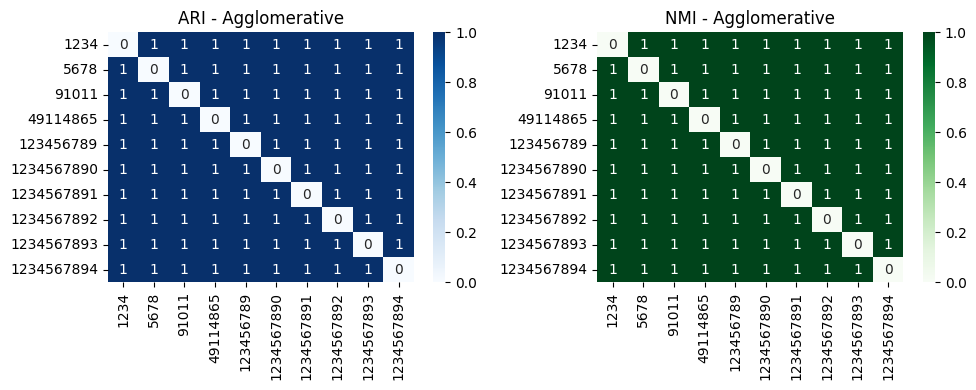

In [25]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

labels_dict = {}
metrics = []

for s in seed:
    clustering = AgglomerativeClustering(n_clusters=5)
    labels = clustering.fit_predict(X_reduced)
    labels_dict[s] = labels

    silhouette = silhouette_score(X_reduced, labels)
    db_index = davies_bouldin_score(X_reduced, labels)
    ch_index = calinski_harabasz_score(X_reduced, labels)
    metrics.append((silhouette, db_index, ch_index))

metrics_array = np.array(metrics)
print("Promedio de métricas (Agglomerative):")
print(f"Silhouette Score: {metrics_array[:,0].mean():.3f} ± {metrics_array[:,0].std():.3f}")
print(f"Davies-Bouldin Index: {metrics_array[:,1].mean():.3f} ± {metrics_array[:,1].std():.3f}")
print(f"Calinski-Harabasz Index: {metrics_array[:,2].mean():.3f} ± {metrics_array[:,2].std():.3f}")

# ARI y NMI
n = len(seed)
ari_matrix = np.zeros((n, n))
nmi_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            ari_matrix[i, j] = adjusted_rand_score(labels_dict[seed[i]], labels_dict[seed[j]])
            nmi_matrix[i, j] = normalized_mutual_info_score(labels_dict[seed[i]], labels_dict[seed[j]])

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(ari_matrix, annot=True, xticklabels=seed, yticklabels=seed, cmap="Blues")
plt.title("ARI - Agglomerative")

plt.subplot(1, 2, 2)
sns.heatmap(nmi_matrix, annot=True, xticklabels=seed, yticklabels=seed, cmap="Greens")
plt.title("NMI - Agglomerative")
plt.tight_layout()
plt.show()


## Gaussian Mixture Model

Promedio de métricas (GMM):
Silhouette Score: 0.371 ± 0.053
Davies-Bouldin Index: 1.183 ± 0.560
Calinski-Harabasz Index: 5.518 ± 0.696


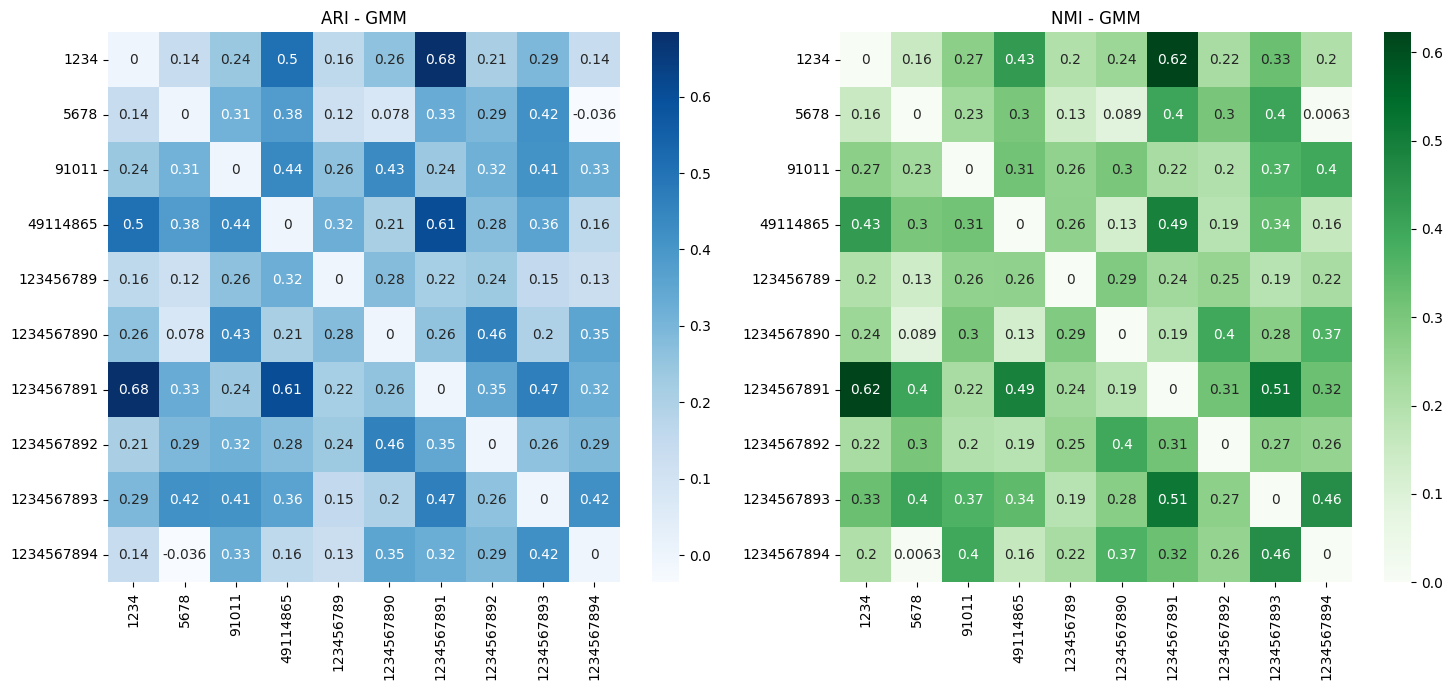

In [26]:
from sklearn.mixture import GaussianMixture

labels_dict = {}
metrics = []

for s in seed:
    clustering = GaussianMixture(n_components=5, random_state=s)
    labels = clustering.fit_predict(X_reduced)
    labels_dict[s] = labels

    silhouette = silhouette_score(X_reduced, labels)
    db_index = davies_bouldin_score(X_reduced, labels)
    ch_index = calinski_harabasz_score(X_reduced, labels)
    metrics.append((silhouette, db_index, ch_index))

metrics_array = np.array(metrics)
print("Promedio de métricas (GMM):")
print(f"Silhouette Score: {metrics_array[:,0].mean():.3f} ± {metrics_array[:,0].std():.3f}")
print(f"Davies-Bouldin Index: {metrics_array[:,1].mean():.3f} ± {metrics_array[:,1].std():.3f}")
print(f"Calinski-Harabasz Index: {metrics_array[:,2].mean():.3f} ± {metrics_array[:,2].std():.3f}")

# ARI y NMI heatmaps
ari_matrix = np.zeros((n, n))
nmi_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            ari_matrix[i, j] = adjusted_rand_score(labels_dict[seed[i]], labels_dict[seed[j]])
            nmi_matrix[i, j] = normalized_mutual_info_score(labels_dict[seed[i]], labels_dict[seed[j]])

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.heatmap(ari_matrix, annot=True, xticklabels=seed, yticklabels=seed, cmap="Blues")
plt.title("ARI - GMM")

plt.subplot(1, 2, 2)
sns.heatmap(nmi_matrix, annot=True, xticklabels=seed, yticklabels=seed, cmap="Greens")
plt.title("NMI - GMM")
plt.tight_layout()
plt.show()
